# Dataset Upgrade
### Uploading and cleaning new sets of images 

In [9]:
from fastai.vision import *
import numpy as np
import pandas as pd

##### Directory creation and uploading files into server

In [2]:
path = Path('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets')

In [3]:
for file, folder in [('babyTurtles.csv', 'babyTurtles'), ('debris.csv', 'debris'), 
                    ('emptyBeaches.csv', 'emptyBeaches'), ('plasticsBeach.csv', 'plasticsBeach'), 
                    ('seaPlants.csv', 'seaPlants')]:
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=5000)

In [4]:
path.ls()

[WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/babyTurtles'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/babyTurtles.csv'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/debris'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/debris.csv'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/emptyBeaches'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/emptyBeaches.csv'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/plasticsBeach'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/plasticsBeach.csv'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/seaPlants'),
 WindowsPath('c:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/new_imageSets/seaPlants.csv')

##### Verifying new images

In [7]:
classes = ['babyTurtles', 'debris', 'emptyBeaches', 'plasticsBeach', 'seaPlants']
for c in classes:
    print(c)
    verify_images(path/folder, delete=True, max_size=5000)

babyTurtles


debris


emptyBeaches


plasticsBeach


seaPlants


##### View data

In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['babyTurtles', 'debris', 'emptyBeaches', 'plasticsBeach', 'seaPlants']

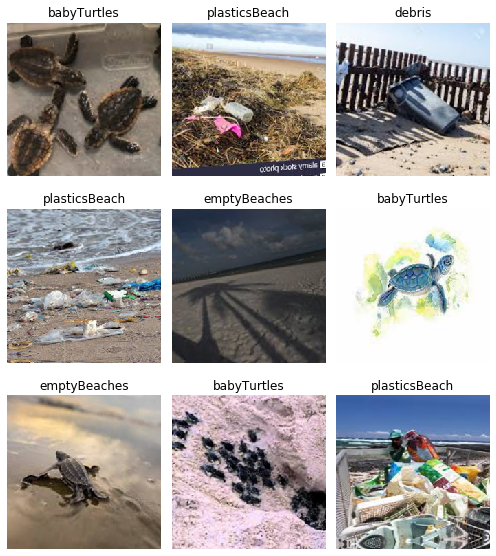

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
# Print each class, number of classes, length of training and validation set
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['babyTurtles', 'debris', 'emptyBeaches', 'plasticsBeach', 'seaPlants'],
 5,
 384,
 96)